<a href="https://colab.research.google.com/github/chandru-2001/Face_detector_Deep_learing/blob/main/Face_detector_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python imutils


In [ ]:
!wget https://github.com/chandrikadeb7/Face-Mask-Detection/archive/refs/heads/master.zip
!unzip master.zip



--2025-11-28 03:11:00--  https://github.com/chandrikadeb7/Face-Mask-Detection/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/chandrikadeb7/Face-Mask-Detection/zip/refs/heads/master [following]
--2025-11-28 03:11:00--  https://codeload.github.com/chandrikadeb7/Face-Mask-Detection/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [   <=>              ] 190.46M  26.4MB/s    in 7.3s    

2025-11-28 03:11:07 (26.2 MB/s) - ‘master.zip’ saved [199714088]

Archive:  master.zip
7e500749401bad4bb338790fbdb89b58e41ef2d9
   creating: Face-Mask-Detecti

In [ ]:
!mv Face-Mask-Detection-master/dataset ./dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
print(train_gen.class_indices)

val_gen = datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3274 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}
Found 818 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 41/103 ━━━━━━━━━━━━━━━━━━━━ 54s 874ms/step - accuracy: 0.7008 - loss: 0.6098

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 98s 943ms/step - accuracy: 0.7860 - loss: 0.4724 - val_accuracy: 0.9560 - val_loss: 0.1644
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 97s 946ms/step - accuracy: 0.9063 - loss: 0.2588 - val_accuracy: 0.9364 - val_loss: 0.1888
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 96s 937ms/step - accuracy: 0.9300 - loss: 0.1765 - val_accuracy: 0.9670 - val_loss: 0.1035
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9529 - loss: 0.1380 - val_accuracy: 0.9658 - val_loss: 0.1149
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 99s 961ms/step - accuracy: 0.9616 - loss: 0.0965 - val_accuracy: 0.9682 - val_loss: 0.0860
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 97s 944ms/step - accuracy: 0.9749 - loss: 0.0698 - val_accuracy: 0.9768 - val_loss: 0.0832
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 98s 947ms/step - accuracy: 0.9797 - loss: 0.0665 - val_accuracy: 0.9780 - val_loss: 0.0741
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 99s 967ms/step - accuracy: 0.9750 - loss: 0.0566 - val_a

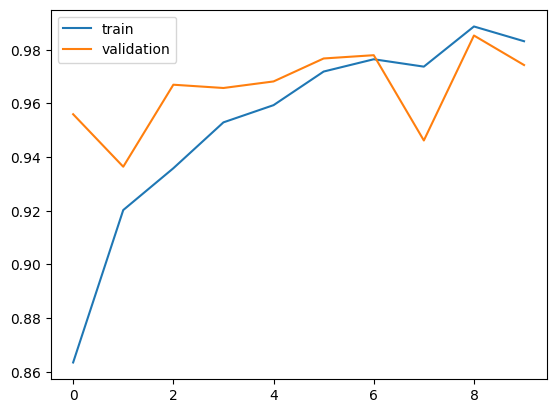

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WITHOUT.jpg to WITHOUT.jpg


In [ ]:
import cv2
import numpy as np

for fn in uploaded.keys():
    # Load and preprocess the image
    img = cv2.imread(fn)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict
    prediction = model.predict(img)
    print("Prediction probabilities:", prediction)  # Shows confidence

    class_index = prediction.argmax()

    # Map index to correct label
    if class_index == 0:
        print("WITHOUT MASK")
    else:
        print("WITH MASK")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction probabilities: [[0.7123371 0.2876629]]
WITHOUT MASK
